In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [58]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [59]:
y = target

In [60]:
x = data

In [61]:
x = x[:,5]

In [62]:
x = x[y<50]

In [63]:
y = y[y<50]

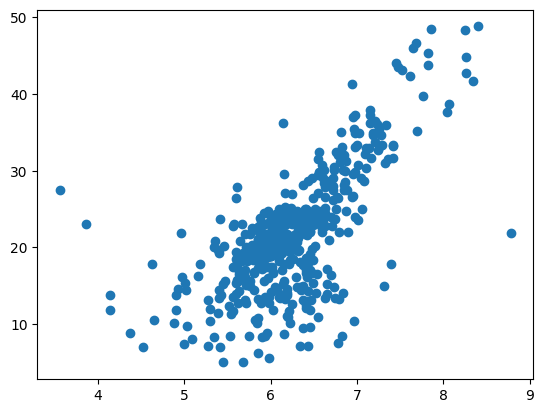

In [64]:
plt.scatter(x,y)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=233)

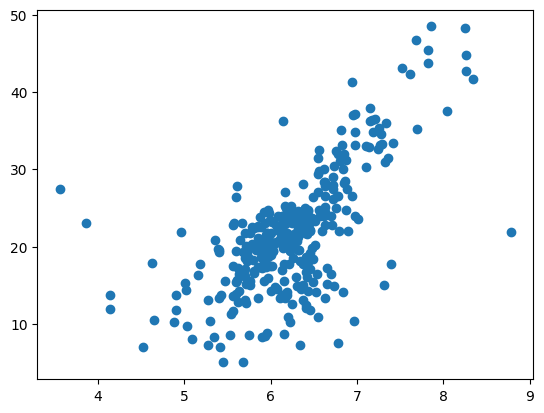

In [66]:
plt.scatter(x_train,y_train)

# 手搓一元线性回归

In [67]:
def fit(x, y):
    a_up= np.sum((x - np. mean(x))*(y - np. mean(y)))
    a_bottom = np.sum((x-np.mean(x))**2)
    a = a_up / a_bottom
    b = np.mean(y) - a * np.mean(x)
    return a, b

In [68]:
a, b = fit(x_train, y_train)

In [69]:
a, b

(7.670406125786831, -26.180917763760615)

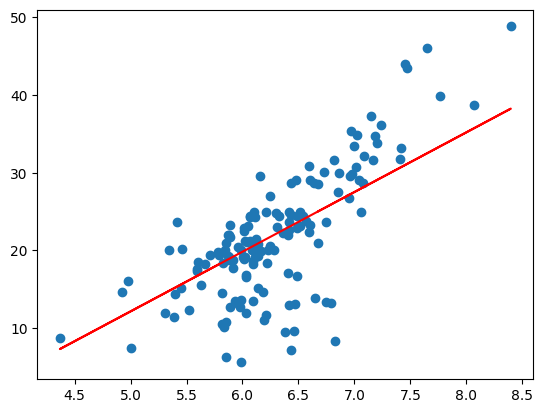

In [70]:
plt.scatter(x_test,y_test)
plt.plot(x_test, a*x_test + b, c='r')

# sk-learn实现一元线性回归

In [71]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

In [72]:
y_predict = lin_reg.predict(x_test.reshape(-1,1))

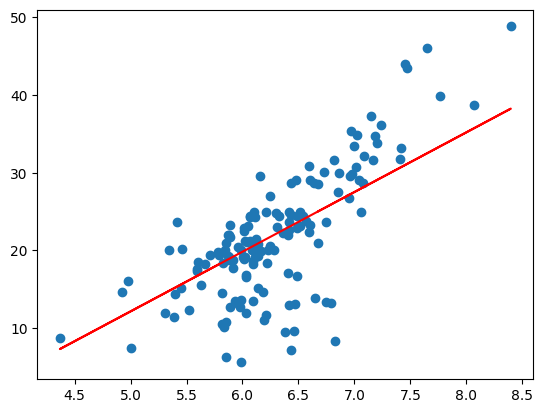

In [73]:
plt.scatter(x_test,y_test)
plt.plot(x_test, a*x_test + b, c='r')

# sk-learn实现多元线性回归

In [74]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [75]:
x = x[y<50]

In [76]:
y = y[y<50]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=233)

In [79]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

这里不是用$A^T*A*c=A*y$算出来的

In [81]:
lin_reg.score(x_test,y_test)

0.8069879488493695

# 归一化？

In [82]:
from sklearn.preprocessing import StandardScaler
standard_scalar = StandardScaler()
standard_scalar.fit(x_train)
x_train = standard_scalar.transform(x_train)
x_test = standard_scalar.transform(x_test)

In [83]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [85]:
x_train

array([[-0.01712739, -0.48460718,  1.02993613, ...,  0.77553513,
        -3.64222683,  0.61030247],
       [-0.38061534, -0.48460718,  2.45741958, ...,  0.72861177,
        -0.41582037,  2.37430741],
       [-0.38601643,  0.64598908, -0.89065103, ...,  0.54091831,
         0.37059035, -0.83834963],
       ...,
       [-0.02744967, -0.48460718,  1.02993613, ...,  0.77553513,
         0.34816812, -0.31463866],
       [-0.39410839,  1.00777988, -1.32748466, ..., -0.06908542,
         0.43829242, -0.89325481],
       [-0.39556233, -0.48460718,  0.1162875 , ...,  1.15092204,
         0.43829242, -1.0101043 ]])

In [84]:
lin_reg.score(x_test,y_test)

0.8069879488493691

可见归一化没什么差别，因为多元线性回归学习的是每一维特征的权重